In [ ]:
# Q1)Given is the dataset of Delivery Time and its Sorting Time.We need to predict the delivery time using Sorting Time.
# Since, there is only one dependent variable , here we use Simple Linear Regression to predict the model.

# First ,we import the dataset in google colab 

from google.colab import files
files = files.upload()

Saving delivery_time.xlsx to delivery_time (2).xlsx


In [ ]:
import pandas as pd
dt = pd.read_excel('delivery_time.xlsx')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


First, we get the information of the given table using the info method from pandas.

In [ ]:
# Shape of the dataset
dt.shape

(21, 2)

In [ ]:
# We also like to find , if there is any duplicate rows.If found,we drop it

dt.drop_duplicates()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


There is no Duplicate values in our DataFrame.

In [ ]:
# Next, let us check if there is any missing data in our DataFrame in both the columns

dt[dt.isnull().any(axis=1)]

,Delivery Time,Sorting Time


Since, there are no null values, we can go ahead of next step.

In [ ]:
# We find the basic summary of the given data using Describe method.

In [ ]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


The Describe method gives a basic Summary of the data .

In [ ]:
# We just find the correlation between Delivery time and Sorting Time.
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


A Correlation is a parameter to check how a variable is related to another.Correlation basically ranges from -1 to 1.

-> A Correlation between -0.5 to 0.5 is Weakly Correlated.

-> A Correlation in the range -0.5 to -1  and 0.5 to 1 is Strongly Correlated to each other.



-> Since, the correlation between Delivery Time and Sorting time is 0.825997.Which means there is a strong correlation between Delivery Time and Sorting Time.

**Visualization**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


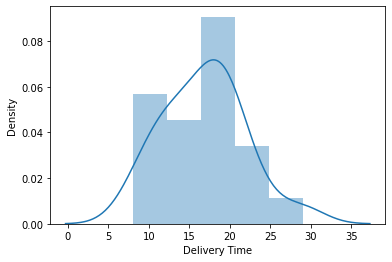

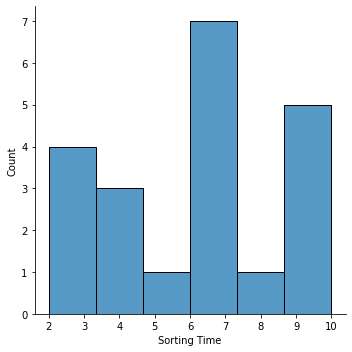

In [ ]:
# Plotting the Graphs.
# We invoke the Distribution plot function from Seaborn.

import seaborn as sns

print(sns.distplot(dt['Delivery Time']))
print(sns.displot(dt['Sorting Time']))

From the graph, we can say that it is a right skewed data.

**Box plot visualization**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82c19e9c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82c19f7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82c19e99a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82c19f77f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82c19f7ac0>],
 'means': []}

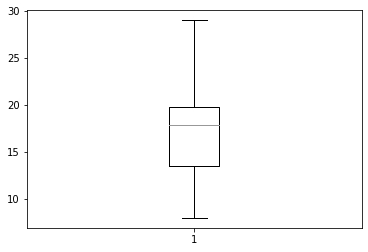

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dt['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82c19cc670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82c19ccc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82c19cc340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82c19d81f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82c19d84c0>],
 'means': []}

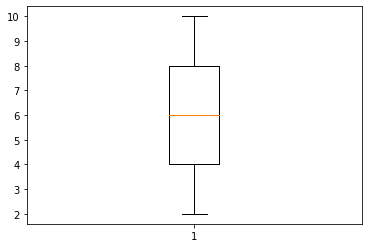

In [ ]:
plt.boxplot(dt['Sorting Time'])

From the boxplots, we say that the values in delivery time column are right skewed data.

The values in sorting time are not much skewed.

**Pairplot data**

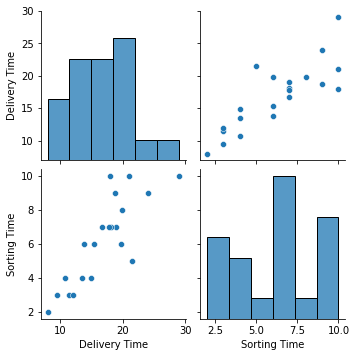

In [ ]:
sns.pairplot(dt)

No Transformations applied

In [ ]:
# Given to predict Delivery time using Sorting time,
# The dependent variable is - > Delivery time
# The independent variable is  -> Sorting time.

# Finding the Linear Regression Model.

import statsmodels.formula.api as smf

model = smf.ols(("dt['Delivery Time'] ~ dt['Sorting Time']"),data=dt).fit()
model

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

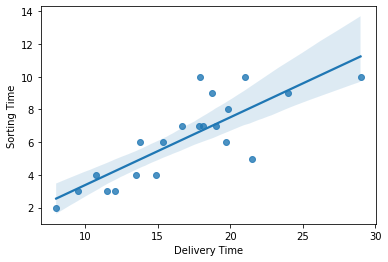

In [ ]:
import seaborn as sns
sns.regplot(x='Delivery Time',y='Sorting Time',data=dt)

The r-squared value of 68.23 % of variation in the dependent variable which is Delivery Time is explained by the independent variable which is Sorting Time. 

In [ ]:
# The Linear Regression line is given as:

# Y = b0 + b1X + e           where b0 is intercept, b1 is slope , e is error

In [ ]:
# Finding Beta -  Coefficients

print(model.params,'\n''\n',model.tvalues,'\n''\n', model.pvalues)   

Intercept             6.582734
dt['Sorting Time']    1.649020
dtype: float64 

 Intercept             3.823349
dt['Sorting Time']    6.387447
dtype: float64 

 Intercept             0.001147
dt['Sorting Time']    0.000004
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     dt['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Sun, 12 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                         10:36:09   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
dt['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R square** **transformations** 

In [ ]:
# Finding r - Squared value for the model.

r_sq = model.rsquared
print('r-squared value = ',round((r_sq*100),2))

r-squared value =  68.23


The r-squared value of 68.23 % of variation in the dependent variable which is Delivery Time is explained by the independent variable which is Sorting Time.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     dt['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Sun, 12 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                         10:31:10   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
dt['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Square root transformations**

Square root transformation of X

In [ ]:
import numpy as np

x_sq = np.sqrt(dt['Sorting Time'])
y=dt['Delivery Time']
model = smf.ols('y ~ x_sq',data=dt).fit()


In [ ]:
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        06:32:50   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
x_sq           7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square root Transformations of Y

In [ ]:
import numpy as np

y_sq = np.sqrt(dt['Delivery Time'])
x=dt['Sorting Time']
model = smf.ols('y_sq ~ x',data=dt).fit()

In [ ]:
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_sq   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.00e-06
Time:                        06:32:50   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
x              0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Root transformations of X & Y

In [ ]:
model = smf.ols('y_sq~x_sq',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_sq   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                        06:32:51   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
x_sq           1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Log Transformation**

**Log Transformations of x **

In [ ]:
import numpy as np

x_log = np.log(dt['Sorting Time'])
y=dt['Delivery Time']
model = smf.ols('y ~ x_log',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        06:32:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
x_log          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation of y

In [ ]:
import numpy as np

x = dt['Sorting Time']
y_log=np.log(dt['Delivery Time'])
model = smf.ols('y_log ~ x',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                        06:32:51   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation of both X and Y

In [ ]:
model = smf.ols('y_log~x_log',data=dt).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                        06:32:51   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
x_log          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Transformations

Square Tranformation of x

In [ ]:
import numpy as np

x_sq = np.square(dt['Sorting Time'])
y=dt['Delivery Time']
model = smf.ols('y ~ x_sq',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        06:32:51   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2372      1.196      9.399      0.000       8.735      13.740
x_sq           0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Transformation of y

In [ ]:
import numpy as np

x = dt['Sorting Time']
y_sq=np.square(dt['Delivery Time'])
model = smf.ols('y_sq ~ x',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_sq   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     28.82
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.52e-05
Time:                        06:32:51   Log-Likelihood:                -128.87
No. Observations:                  21   AIC:                             261.7
Df Residuals:                      19   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.4401     69.013     -0.543      0.594    -181.887     107.007
x             55.5538     10.348      5.368      0.000      33.894      77.213
==============================================================================
Omnibus:                        9.930   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.498
Skew:                           1.194   Prob(JB):                       0.0235
Kurtosis:                       4.694   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Transformation of X and Y

In [ ]:
import numpy as np

x_sq = np.square(dt['Sorting Time'])
y_sq=np.square(dt['Delivery Time'])
model = smf.ols('y_sq ~ x_sq',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_sq   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.99e-05
Time:                        06:52:02   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1548     45.231      2.524      0.021      19.485     208.825
x_sq           4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

After doing all the neccasary transformations and doing an analysis, we see that
**Log Transformation ** fits the model with a R square value of 77.2% , which is better than other transformation.


In [ ]:
# 2) We are given with the dataset of Salary and Years of Experience .
# We are required to predict the best fit model to predict it.

# we use Simple Linear Regression to find the best fit model.

In [ ]:

from google.colab import files
files = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
import pandas as pd
SD = pd.read_csv('Salary_Data.csv')
SD

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
# First,we would like to see the given information 

SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


As we can see that the SD dataset has an information of Salary and respective Years of Experience.

In [ ]:
# Next , let us check whether we have null values in our dataset

SD[SD.isnull().any(axis=1)]

,YearsExperience,Salary


We dont have any null values in our dataset.

In [ ]:
# Next, we shall see the basic summary of the dataset.
# Using describe method

SD.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Next , we check what is the correlation between Years of Experience and Salary

SD.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Since, the Years of Experience and Salary have 0.978 coefficient of Correlation.It is highly correlated between each other.

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


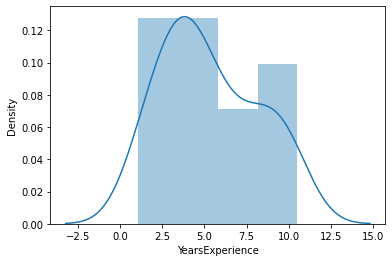

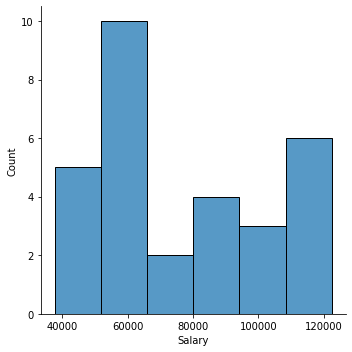

In [ ]:
# Plotting the Graphs.

import seaborn as sns

print(sns.distplot(SD['YearsExperience']))
print(sns.displot(SD['Salary']))

We see that the data is right skewed data which was given to us.

In [ ]:
# Given to predict Salary using Years of Experience,
# The dependent variable is - > Salary
# The independent variable is  -> Years of Experience.

# Fitting the Linear Regression Model.

import statsmodels.formula.api as smf

model = smf.ols(("SD['Salary'] ~ SD['YearsExperience']"),data=SD).fit()
model

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

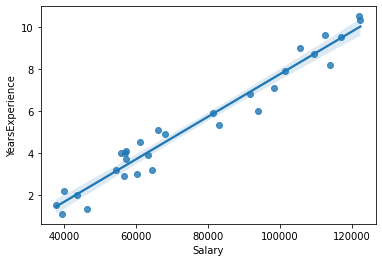

In [ ]:
import seaborn as sns
sns.regplot(x='Salary',y='YearsExperience',data=SD)

The r squared value of the model is 95.69%.This states that the variation in the dependent variable , which is Salary , is explained by the independent variable,which is Years of Experience.

In [ ]:
# Finding Beta - Coefficient values

model.params

Intercept                25792.200199
SD['YearsExperience']     9449.962321
dtype: float64

In [ ]:
model.fittedvalues              # These are the values for all the y values which is the equation of line.
                                   
                                # Y = b0 + b1X + e           where b0 is intercept, b1 is slope , e is error   
                                   

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [ ]:
SD['Error'] = model.resid
SD                                             # We also add the error column.

,YearsExperience,Salary,Error
0,1.1,39343,3155.841248
1,1.3,46205,8127.848783
2,1.5,37731,-2236.143681
3,2.0,43525,-1167.124842
4,2.2,39891,-6691.117306
5,2.9,56642,3444.909069
6,3.0,60150,6007.912837
7,3.2,54445,-1587.079627
8,3.2,64445,8412.920373
9,3.7,57189,-3568.060788


In [ ]:
model.rsquared

0.9569566641435086

In [ ]:
model.rsquared*100

95.69566641435085

The r squared value of the model is 95.69%.This states that the 95.69% variation in the dependent variable , which is Salary , is explained by the independent variable,which is Years of Experience.

**Transformations**

Log Transformations

Log Transformation of x

In [ ]:
import numpy as np

x_log = np.log(SD['YearsExperience'])
y = SD['Salary']

In [ ]:
model = smf.ols('y ~ x_log',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        07:06:45   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
x_log       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation of y

In [ ]:
import numpy as np

x = SD['YearsExperience']
y_log = np.log(SD['Salary'])

In [ ]:
model = smf.ols('y_log ~ x',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        07:10:55   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Log Transformation of X and Y**

In [ ]:
import numpy as np

x_log = np.log(SD['YearsExperience'])
y_log = np.log(SD['Salary'])

In [ ]:
model = smf.ols('y_log ~ x_log',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                        07:12:48   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
x_log          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Square Root Transformations**

Square root transformation of x

In [ ]:
import numpy as np

x_sqrt = np.sqrt(SD['YearsExperience'])
y = SD['Salary']

In [ ]:
model = smf.ols('y ~ x_sqrt',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.57e-18
Time:                        07:15:27   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
x_sqrt       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Root Transformation of Y

In [ ]:
import numpy as np

x = SD['YearsExperience']
y_sqrt = np.sqrt(SD['Salary'])

In [ ]:
model = smf.ols('y_sqrt ~ x',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           9.78e-20
Time:                        07:18:21   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
x             17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square root transformation of X and Y

In [ ]:
import numpy as np

x_sqrt = np.sqrt(SD['YearsExperience'])
y_sqrt = np.sqrt(SD['Salary'])

In [ ]:
model = smf.ols('y_sqrt ~ x_sqrt',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                        07:20:35   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
x_sqrt        75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Square Transformations**

Square Transformation of X

In [ ]:
import numpy as np

x_sq = np.square(SD['YearsExperience'])
y = SD['Salary']

In [ ]:
model = smf.ols('y ~ x_sq',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.52e-16
Time:                        07:23:19   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
x_sq         776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Transformation of Y

In [ ]:
import numpy as np

x = SD['YearsExperience']
y_sq = np.square(SD['Salary'])

In [ ]:
model = smf.ols('y_sq ~ x',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_sq   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     499.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.15e-19
Time:                        07:25:31   Log-Likelihood:                -664.52
No. Observations:                  30   AIC:                             1333.
Df Residuals:                      28   BIC:                             1336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.61e+09    4.1e+08     -3.927      0.001   -2.45e+09    -7.7e+08
x           1.527e+09   6.83e+07     22.353      0.000    1.39e+09    1.67e+09
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.890
Skew:                           0.040   Prob(JB):                        0.641
Kurtosis:                       2.160   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Transformation of X and Y

In [ ]:
import numpy as np

x_sq = np.square(SD['YearsExperience'])
y_sq = np.square(SD['Salary'])

In [ ]:
model = smf.ols('y_sq ~ x_sq',data=SD).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_sq   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     581.9
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.82e-20
Time:                        07:27:23   Log-Likelihood:                -662.35
No. Observations:                  30   AIC:                             1329.
Df Residuals:                      28   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.866e+09   2.61e+08      7.138      0.000    1.33e+09     2.4e+09
x_sq        1.287e+08   5.34e+06     24.122      0.000    1.18e+08     1.4e+08
==============================================================================
Omnibus:                        6.800   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.404
Skew:                           1.014   Prob(JB):                       0.0671
Kurtosis:                       3.454   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

After all these transformations , we see that R squared value transformation of r square value of 95.69% gives the better model accuracy for this dataset.